# Соболева Е.Д. ИУ5-21М
## Рубежный контроль 1
### Вариант 11
### Задание: Задача №2.
#### Для заданного набора данных проведите обработку пропусков в данных.
#### Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? 
Для заполнения пропусков в количественных данных была произведена импутация средних (mean) значений по признаку при помощи классса SimpleImputer библиотеки sklearn.impute.
Для заполнения пропусков в категориальных данных была произведена импутация наиболее часто встречающихся значений при помощи классса SimpleImputer библиотеки sklearn.impute, а также преобразование в количественные признаки при помощи классса LabelEncoder библиотеки sklearn.preprocessing.
#### Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
В дальнейшем планируется использовать признаки Nationality, Age, Skill Moves,Weak Foot, Work Rate, Body Type, Position, Height, Weight,Crossing, Dribbling, Finishing, HeadingAccuracy, ShortPassing, Volleys, Curve, FKAccuracy, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Composure, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes для предсказания таких параметров как Overall, Potential, Club, Value, Wage, International Reputation, Penalties, Release Clause.
Используемые признаки показывают мастерство футболистов, по ним можно предсказывать рейтинг, зарплаты футболистов, а так же делать предположения, за какие клубы они могут играть.
#### Для заданного набора данных произведите масштабирование данных и преобразование категориальных признаков в количественные. 
#### Какие методы Вы использовали для решения задачи и почему?
Было произведено 3 варианта масштабирования - MinMax, Z - ценка и нормализация при помощи классов MinMaxScaler, StandardScaler, Normalizer библиотеки sklearn.preprocessing. 
В результате нормализации все значения были приведены к 1 или к 0, в связи с чем данный вид нормализации перестал отображать какие-либо зависимости, в отличие от методов MinMaxScaler, StandardScaler, которые дали похожие результаты, отличающиеся диапазоном.
#### Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

### Загрузка набора данных

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

In [192]:
data = pd.read_csv('data.csv', sep=",")

In [193]:
data.shape

(18207, 89)

In [194]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

##### Кол-во пустых значений в колонках

In [195]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [196]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [197]:
total_count = data.shape[0]
print('Строки в наборе : {}'.format(total_count))

Строки в наборе : 18207


## Обработка пропусков
##### Удаление колонок, содержащих пустые значения

In [198]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((18207, 89), (18207, 13))

##### Удаление строк, содержащих пустые значения

In [199]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((18207, 89), (0, 89))

Видим, что при удалении колонок с пустыми значениями удаляется слишком много колонок, а при удалении строк с пропусками удаляются вообще все строки. Сделаем вывод, что эти методы не подходят

##### Заполнение всех пропущенных значений нулями

In [200]:
data_new_3 = data.fillna(0)
data_new_3.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Импьютация

### Числовые данные

##### Выберем числовые колонки с пропущенными значениями

In [201]:
num_cols = []
def print_nones_num():
    print('Колонка -  Тип данных - Количество пустых значений')
    for col in data.columns:
        # Количество пустых значений 
        temp_null_count = data[data[col].isnull()].shape[0]
        dt = str(data[col].dtype)
        if temp_null_count>0 and (dt=='float64' or dt=='int64'):
            num_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print('{} - {} - {}'.format(col,
                                        dt,  
                                        temp_null_count,
                                        temp_perc))

In [202]:
print_nones_num()

Колонка -  Тип данных - Количество пустых значений
International Reputation - float64 - 48
Weak Foot - float64 - 48
Skill Moves - float64 - 48
Jersey Number - float64 - 60
Crossing - float64 - 48
Finishing - float64 - 48
HeadingAccuracy - float64 - 48
ShortPassing - float64 - 48
Volleys - float64 - 48
Dribbling - float64 - 48
Curve - float64 - 48
FKAccuracy - float64 - 48
LongPassing - float64 - 48
BallControl - float64 - 48
Acceleration - float64 - 48
SprintSpeed - float64 - 48
Agility - float64 - 48
Reactions - float64 - 48
Balance - float64 - 48
ShotPower - float64 - 48
Jumping - float64 - 48
Stamina - float64 - 48
Strength - float64 - 48
LongShots - float64 - 48
Aggression - float64 - 48
Interceptions - float64 - 48
Positioning - float64 - 48
Vision - float64 - 48
Penalties - float64 - 48
Composure - float64 - 48
Marking - float64 - 48
StandingTackle - float64 - 48
SlidingTackle - float64 - 48
GKDiving - float64 - 48
GKHandling - float64 - 48
GKKicking - float64 - 48
GKPositioning 

##### Фильтр по колонкам с пропущенными значениями

In [203]:
data_num = data[num_cols]
data_num

,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,1.0,2.0,2.0,22.0,34.0,38.0,40.0,49.0,25.0,42.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,1.0,2.0,2.0,21.0,23.0,52.0,52.0,43.0,36.0,39.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,1.0,3.0,2.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,1.0,3.0,2.0,34.0,44.0,50.0,39.0,42.0,40.0,51.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


### Функция импутации, которая позволяет задавать колонку и вид импьютации

In [204]:
strategies=['mean', 'median','most_frequent']

In [205]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
   
    filled_data = data_num_imp[mask_missing_values_only]
    dataset[column] = data_num_imp
    
    return column, data_num_imp, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [206]:
for col in data_num:
    imp = test_num_impute_col(data, col, strategies[0])
    data[col] = imp[1]

#### Проверим, что не осталось числовых колонок с пустыми значениями

In [207]:
print_nones_num()

Колонка -  Тип данных - Количество пустых значений


## Обработка пропусков в категориальных данных

In [208]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
def print_nones_cat():
    print('Колонка - Тип данных - Количество пустых значений' )
    for col in data.columns:
        # Количество пустых значений 
        temp_null_count = data[data[col].isnull()].shape[0]
        dt = str(data[col].dtype)
        if temp_null_count>0 and (dt=='object'):
            cat_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print('{} - {} - {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [209]:
print_nones_cat()

Колонка - Тип данных - Количество пустых значений
Club - object - 241, 1.32%.
Preferred Foot - object - 48, 0.26%.
Work Rate - object - 48, 0.26%.
Body Type - object - 48, 0.26%.
Real Face - object - 48, 0.26%.
Position - object - 60, 0.33%.
Joined - object - 1553, 8.53%.
Loaned From - object - 16943, 93.06%.
Contract Valid Until - object - 289, 1.59%.
Height - object - 48, 0.26%.
Weight - object - 48, 0.26%.
LS - object - 2085, 11.45%.
ST - object - 2085, 11.45%.
RS - object - 2085, 11.45%.
LW - object - 2085, 11.45%.
LF - object - 2085, 11.45%.
CF - object - 2085, 11.45%.
RF - object - 2085, 11.45%.
RW - object - 2085, 11.45%.
LAM - object - 2085, 11.45%.
CAM - object - 2085, 11.45%.
RAM - object - 2085, 11.45%.
LM - object - 2085, 11.45%.
LCM - object - 2085, 11.45%.
CM - object - 2085, 11.45%.
RCM - object - 2085, 11.45%.
RM - object - 2085, 11.45%.
LWB - object - 2085, 11.45%.
LDM - object - 2085, 11.45%.
CDM - object - 2085, 11.45%.
RDM - object - 2085, 11.45%.
RWB - object - 208

In [210]:
cat_temp_data1 = []
for col in cat_cols:
    cat_temp_data1.append(data[[col]])
cat_temp_data1

[                      Club
 0             FC Barcelona
 1                 Juventus
 2      Paris Saint-Germain
 3        Manchester United
 4          Manchester City
 ...                    ...
 18202      Crewe Alexandra
 18203       Trelleborgs FF
 18204     Cambridge United
 18205      Tranmere Rovers
 18206      Tranmere Rovers
 
 [18207 rows x 1 columns],
       Preferred Foot
 0               Left
 1              Right
 2              Right
 3              Right
 4              Right
 ...              ...
 18202          Right
 18203          Right
 18204          Right
 18205          Right
 18206          Right
 
 [18207 rows x 1 columns],
             Work Rate
 0      Medium/ Medium
 1           High/ Low
 2        High/ Medium
 3      Medium/ Medium
 4          High/ High
 ...               ...
 18202  Medium/ Medium
 18203  Medium/ Medium
 18204  Medium/ Medium
 18205  Medium/ Medium
 18206  Medium/ Medium
 
 [18207 rows x 1 columns],
         Body Type
 0           Messi

### Импьютация и  преобразование категориальных признаков в числовые

#### Импьютация наиболее частыми значениями

In [211]:
def cat_imp(strategy='most_frequent'):
    le = LabelEncoder()
    for col in cat_temp_data1:
        imp3 = SimpleImputer(missing_values=np.nan, strategy=strategy, fill_value='!!!!!')
        data_imp3 = imp3.fit_transform(col)
        cat_enc = pd.DataFrame({col.columns[0]:data_imp3.T[0]})
#         cat_enc_le = le.fit_transform(cat_enc[col.columns[0]])
        print(col.columns[0], ': ', cat_enc)
        data[col.columns[0]] = cat_enc


In [212]:
cat_imp()

Club :                        Club
0             FC Barcelona
1                 Juventus
2      Paris Saint-Germain
3        Manchester United
4          Manchester City
...                    ...
18202      Crewe Alexandra
18203       Trelleborgs FF
18204     Cambridge United
18205      Tranmere Rovers
18206      Tranmere Rovers

[18207 rows x 1 columns]
Preferred Foot :        Preferred Foot
0               Left
1              Right
2              Right
3              Right
4              Right
...              ...
18202          Right
18203          Right
18204          Right
18205          Right
18206          Right

[18207 rows x 1 columns]
Work Rate :              Work Rate
0      Medium/ Medium
1           High/ Low
2        High/ Medium
3      Medium/ Medium
4          High/ High
...               ...
18202  Medium/ Medium
18203  Medium/ Medium
18204  Medium/ Medium
18205  Medium/ Medium
18206  Medium/ Medium

[18207 rows x 1 columns]
Body Type :          Body Type
0           

In [213]:
def cat_to_num():
    le = LabelEncoder()
    for col in data.columns:
        dt = str(data[col].dtype)
        if (dt=='object'):
            cat_enc_le = le.fit_transform(data[col])
            print(col, ': ', cat_enc_le)
            data[col] = cat_enc_le


#### Преобразование категориальных в числовые значения

In [214]:
cat_to_num()

Name :  [ 9632  3153 12508 ...  2133  3997  5807]
Photo :  [  566  6031  3131 ... 15506 17998 17999]
Nationality :  [  6 123  20 ...  46  46  46]
Flag :  [122 107 124 ...  40  40  40]
Club :  [212 326 435 ... 122 586 586]
Club Logo :  [490 552 637 ... 446 328 328]
Value :  [ 16 195  18 ... 171 171 171]
Wage :  [94 74 55 ... 31 31 31]
Preferred Foot :  [0 1 1 ... 1 1 1]
Work Rate :  [8 1 2 ... 8 8 8]
Body Type :  [4 1 5 ... 6 3 3]
Real Face :  [1 1 1 ... 0 0 0]
Position :  [21 26 14 ... 26 24  4]
Joined :  [ 774  794  247 ...  787   54 1576]
Loaned From :  [26 26 26 ... 26 26 26]
Contract Valid Until :  [3 4 4 ... 3 1 1]
Height :  [ 8 13 10 ...  9  1  1]
Weight :  [21 32 17 ... 16 19 29]
LS :  [91 92 86 ... 14 16 12]
ST :  [91 92 86 ... 14 16 12]
RS :  [91 92 86 ... 14 16 12]
LW :  [104 103 103 ...  21  23  21]
LF :  [101 100  99 ...  19  19  17]
CF :  [101 100  99 ...  19  19  17]
RF :  [101 100  99 ...  19  19  17]
RW :  [104 103 103 ...  21  23  21]
LAM :  [100  98  99 ...  18  19  1

In [215]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,9632,31,566,6,122,94,94,212,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,293
1,1,20801,3153,33,6031,123,107,94,94,326,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,82
2,2,190871,12508,26,3131,20,124,92,93,435,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,294
3,3,193080,4136,27,3467,139,114,91,93,375,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,104
4,4,192985,8617,27,3452,13,137,91,92,374,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,232


#### Проверим, что нет категориальных колонок с пропущенными значениями

In [216]:
print_nones_cat()

Колонка - Тип данных - Количество пустых значений


## Масштабирование данных

### MinMax

Unnamed: 0


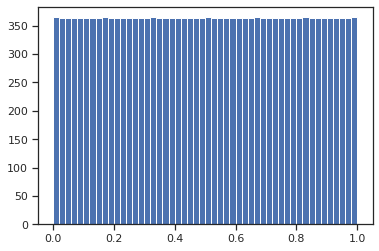

ID


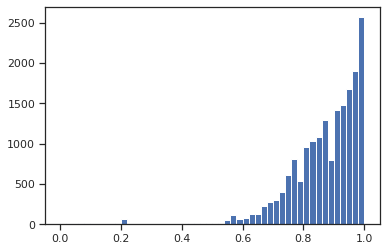

Name


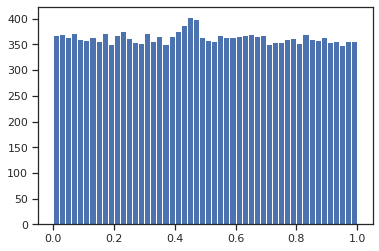

Age


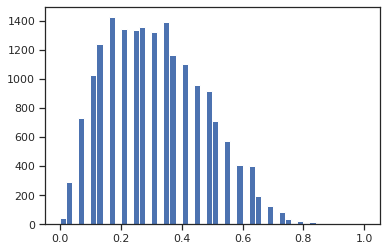

Photo


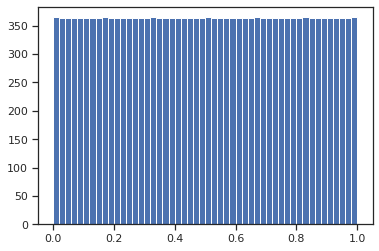

Nationality


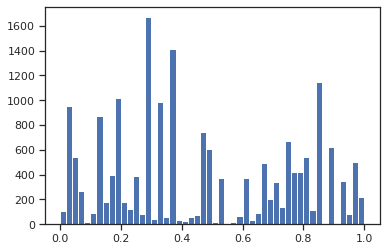

Flag


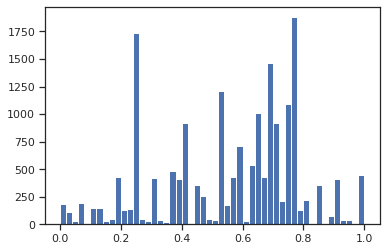

Overall


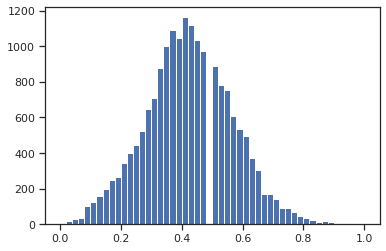

Potential


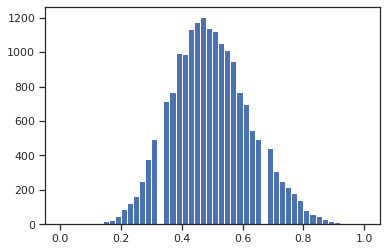

Club


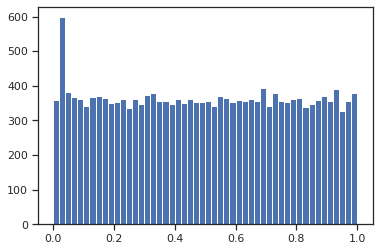

Club Logo


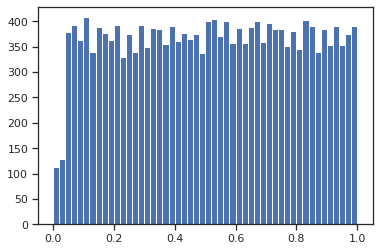

Value


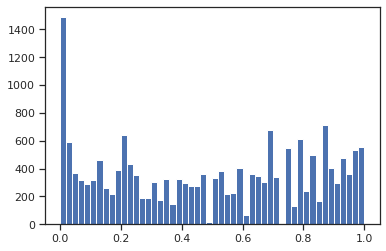

Wage


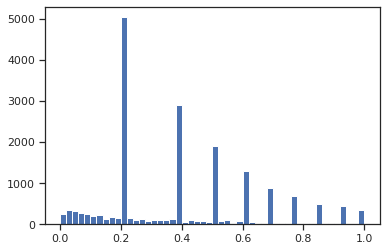

Special


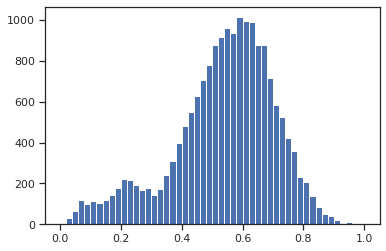

Preferred Foot


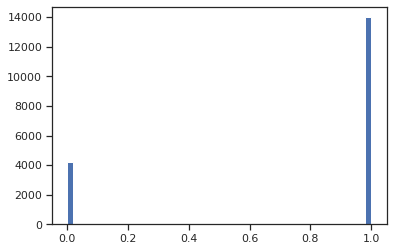

International Reputation


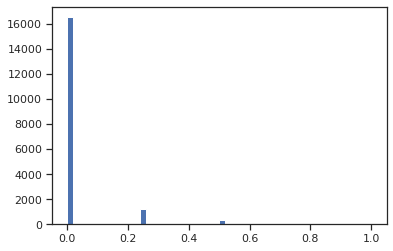

Weak Foot


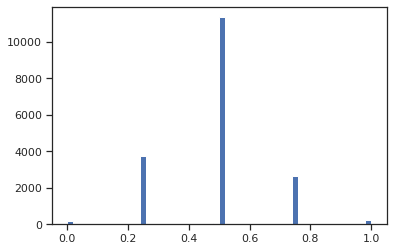

Skill Moves


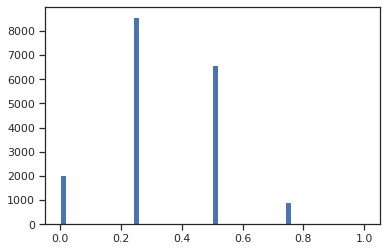

Work Rate


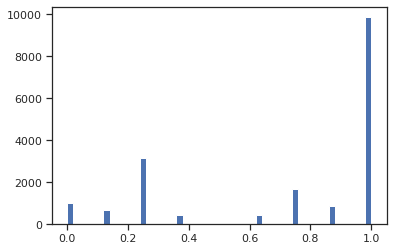

Body Type


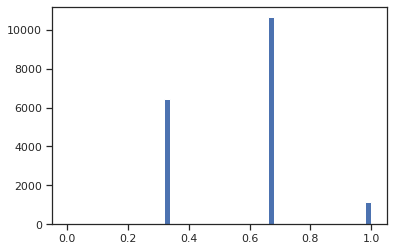

Real Face


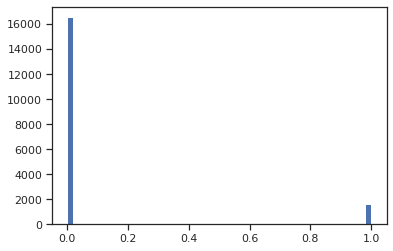

Position


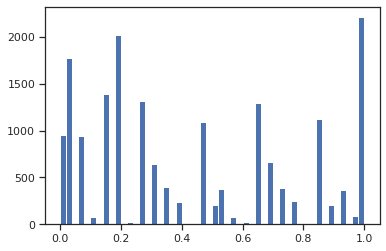

Jersey Number


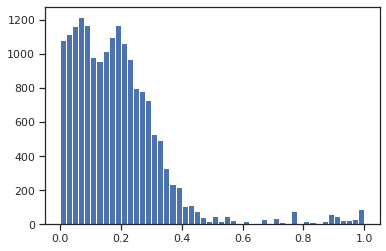

Joined


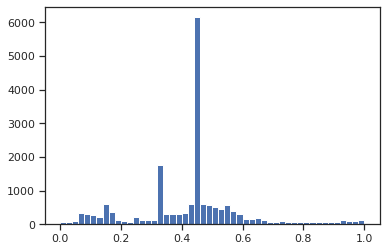

Loaned From


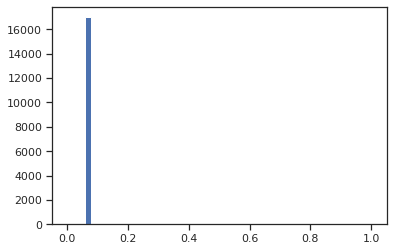

Contract Valid Until


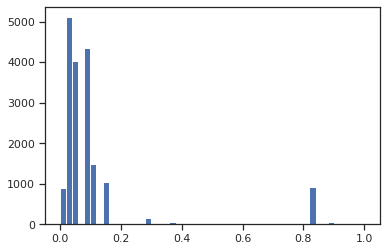

Height


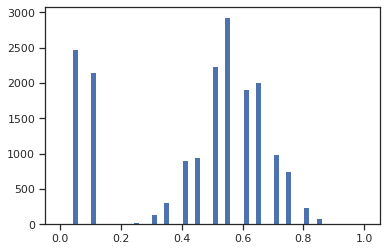

Weight


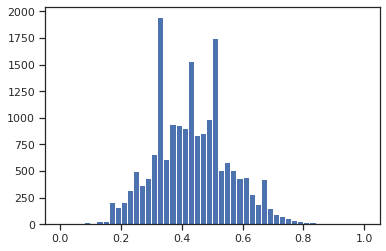

LS


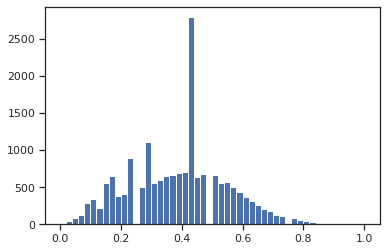

ST


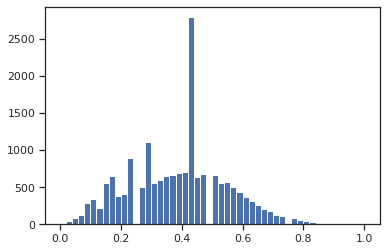

RS


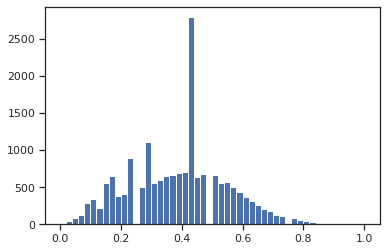

LW


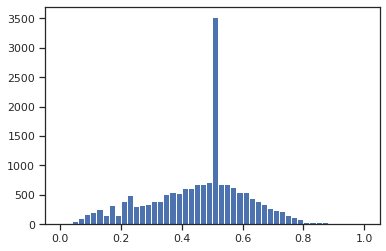

LF


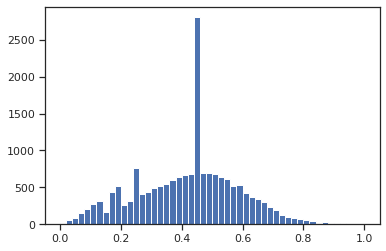

CF


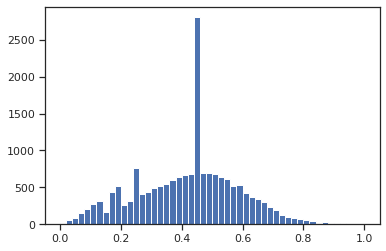

RF


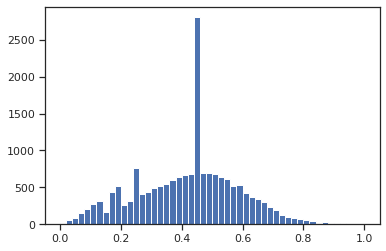

RW


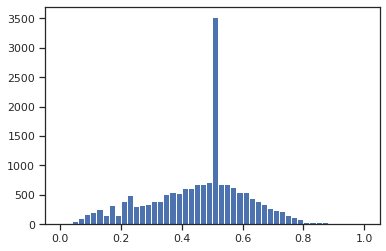

LAM


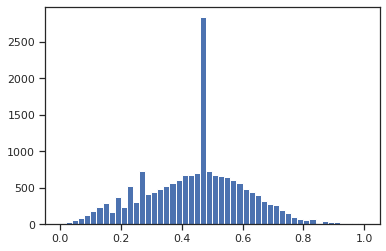

CAM


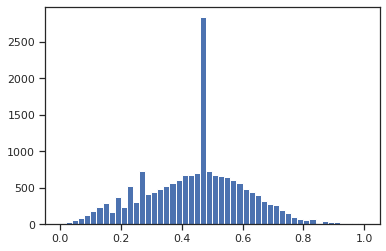

RAM


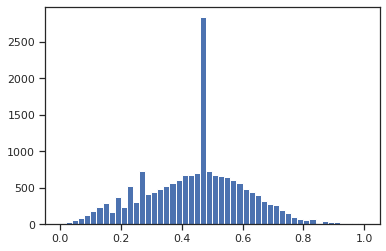

LM


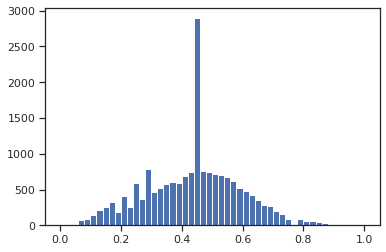

LCM


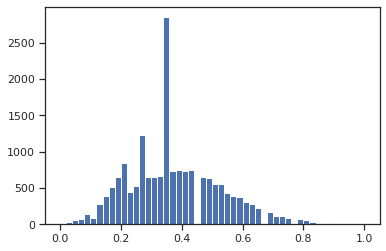

CM


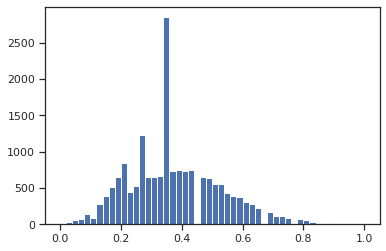

RCM


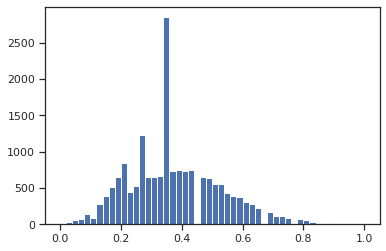

RM


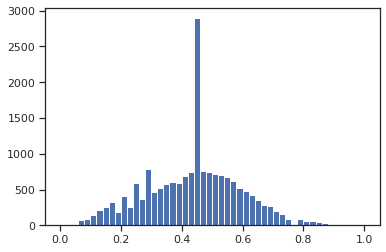

LWB


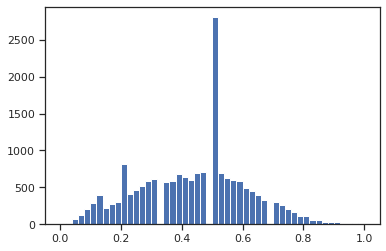

LDM


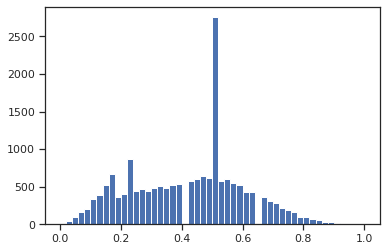

CDM


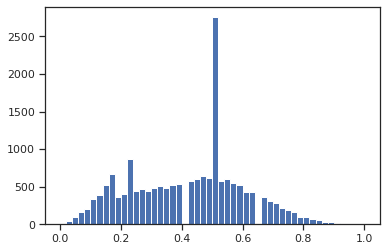

RDM


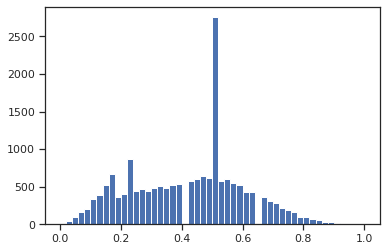

RWB


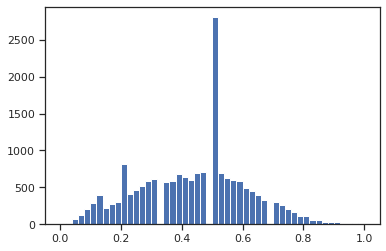

LB


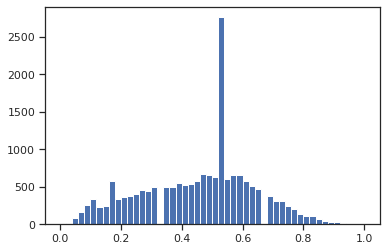

LCB


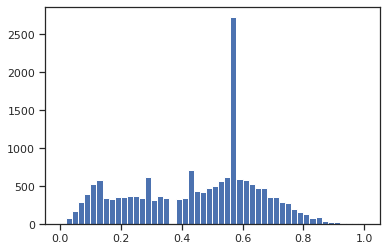

CB


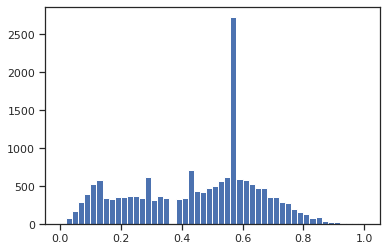

RCB


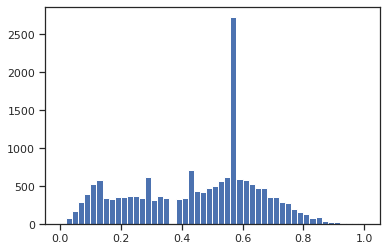

RB


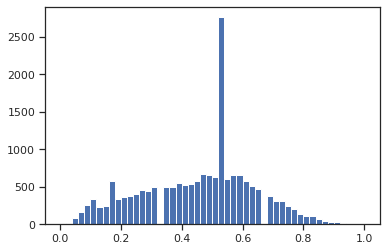

Crossing


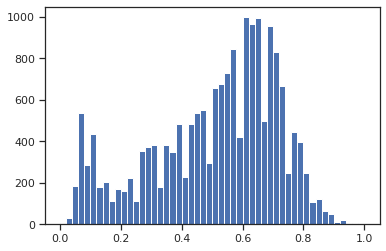

Finishing


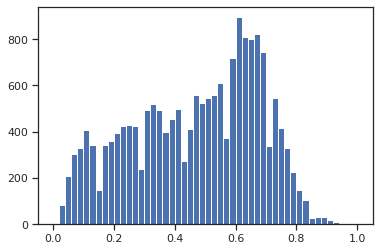

HeadingAccuracy


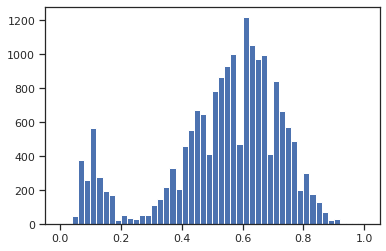

ShortPassing


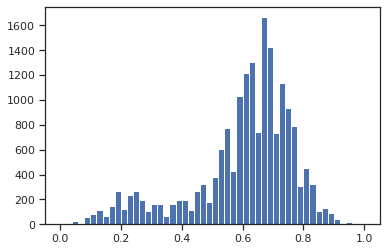

Volleys


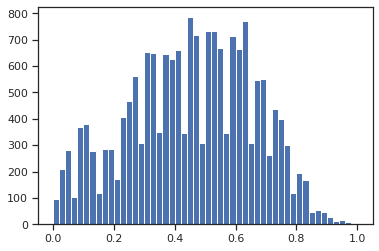

Dribbling


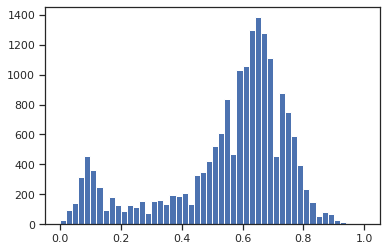

Curve


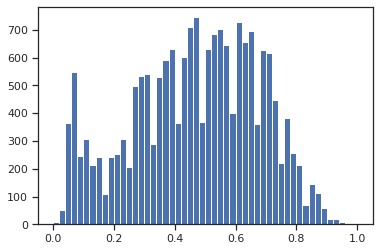

FKAccuracy


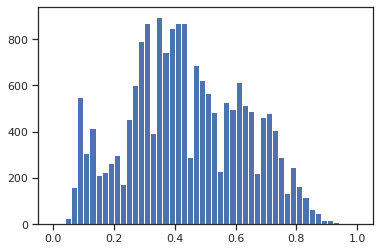

LongPassing


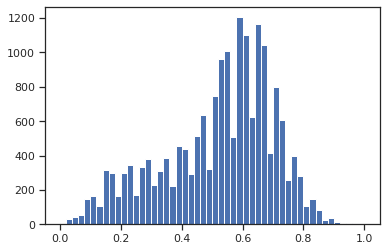

BallControl


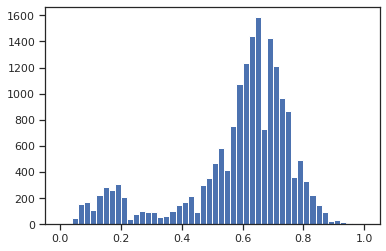

Acceleration


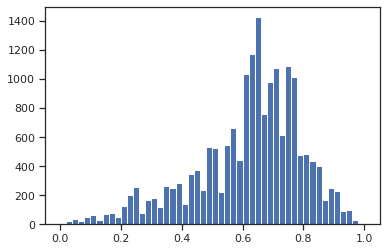

SprintSpeed


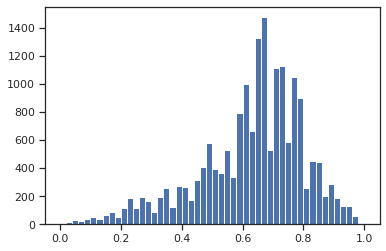

Agility


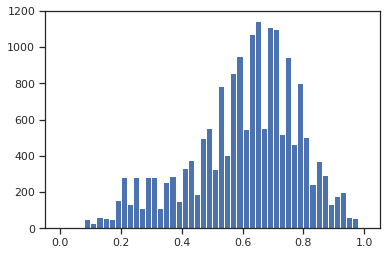

Reactions


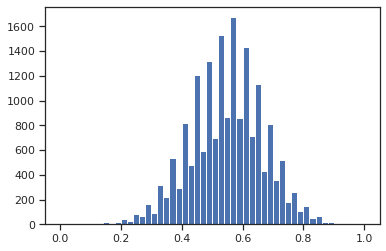

Balance


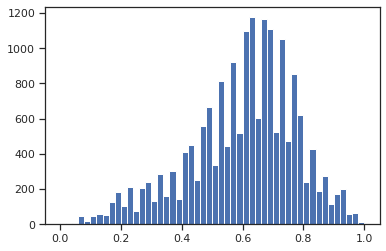

ShotPower


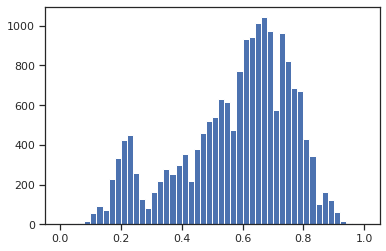

Jumping


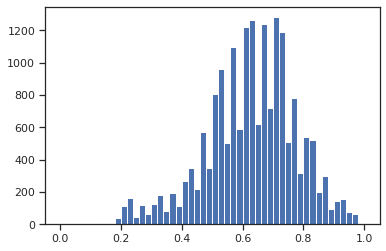

Stamina


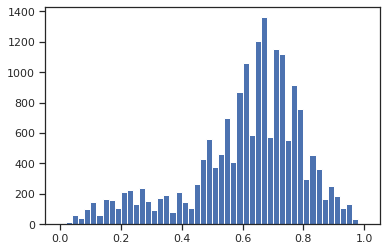

Strength


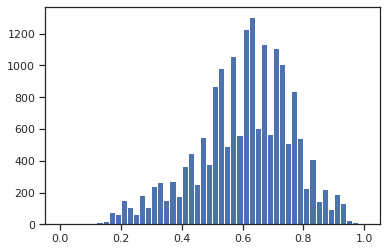

LongShots


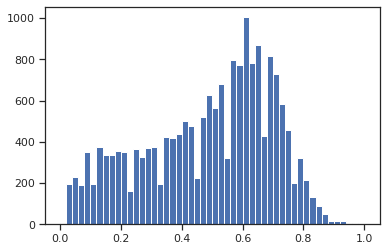

Aggression


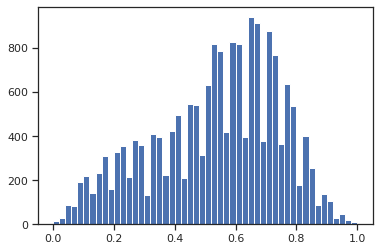

Interceptions


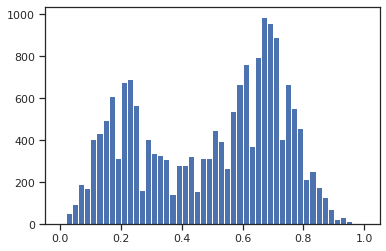

Positioning


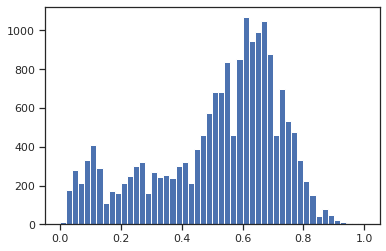

Vision


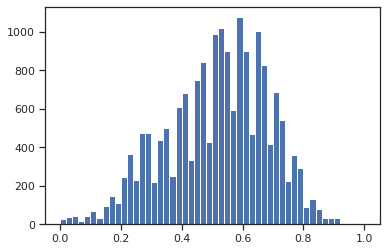

Penalties


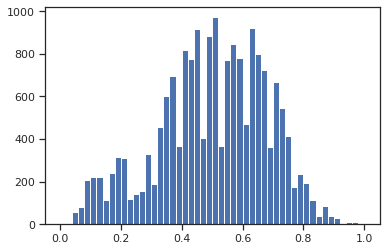

Composure


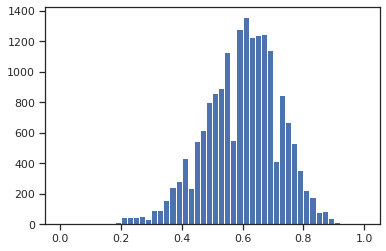

Marking


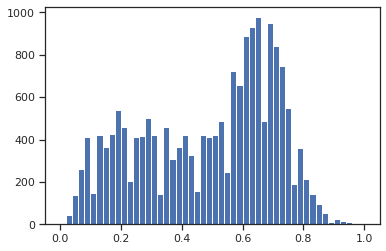

StandingTackle


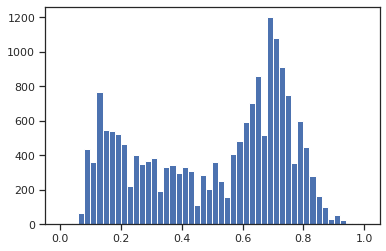

SlidingTackle


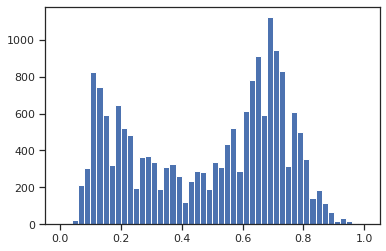

GKDiving


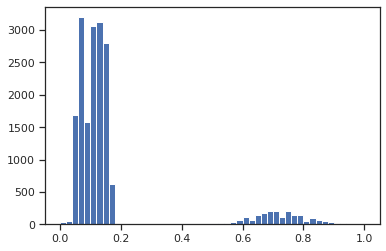

GKHandling


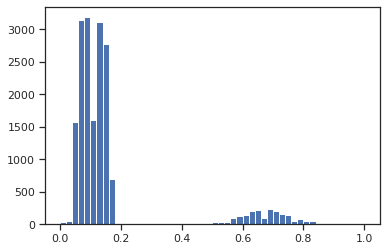

GKKicking


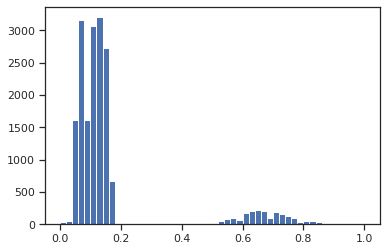

GKPositioning


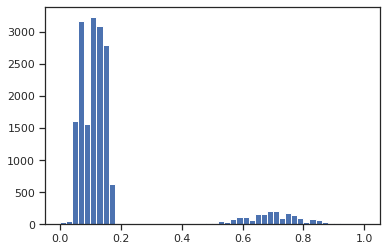

GKReflexes


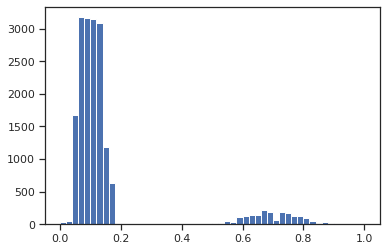

Release Clause


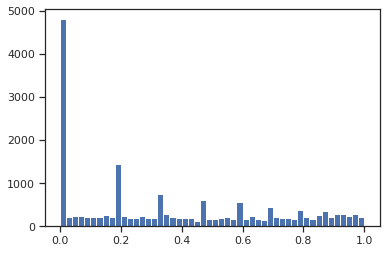

In [217]:
sc = MinMaxScaler()
for col in data.columns:
    sc_data = sc.fit_transform(data[[col]])
    print(col)
    plt.hist(sc_data, 50)
    plt.show()

### Z-оценка

Unnamed: 0


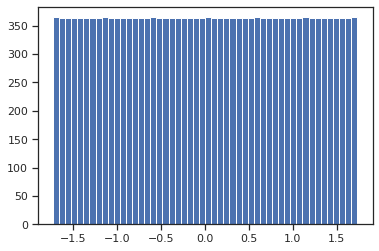

ID


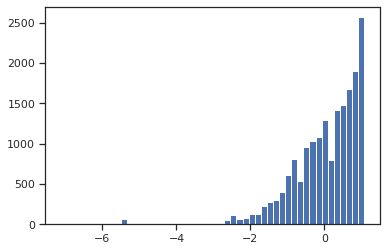

Name


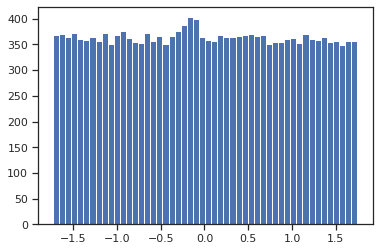

Age


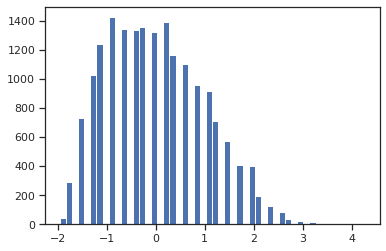

Photo


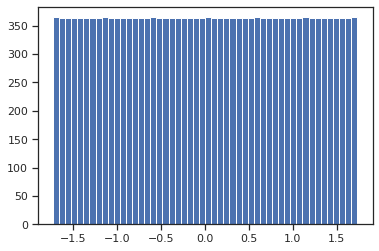

Nationality


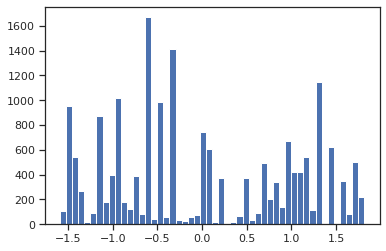

Flag


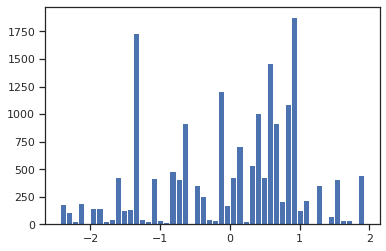

Overall


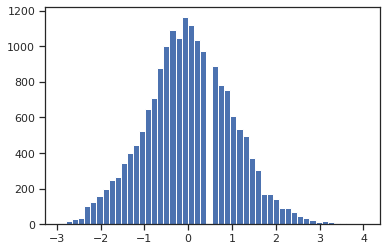

Potential


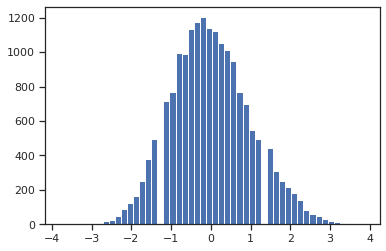

Club


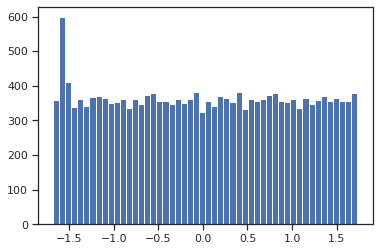

Club Logo


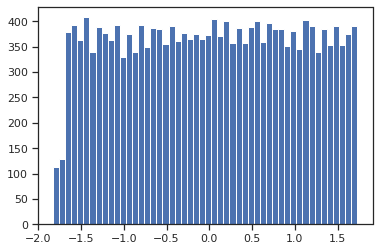

Value


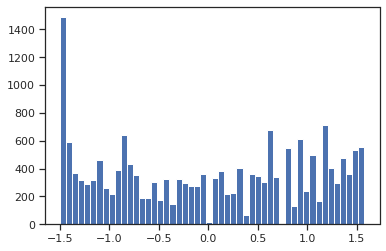

Wage


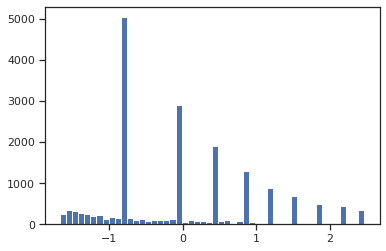

Special


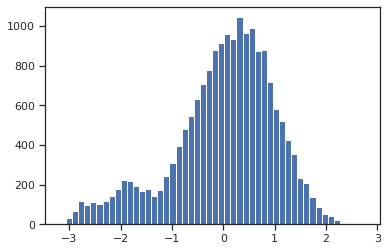

Preferred Foot


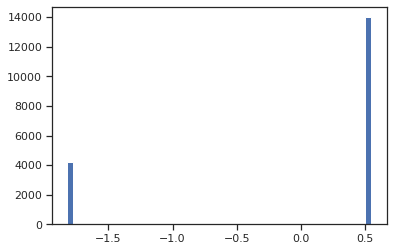

International Reputation


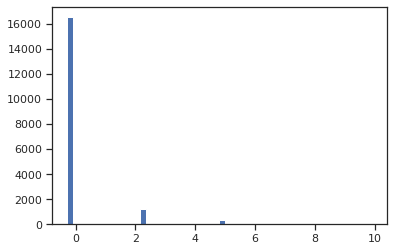

Weak Foot


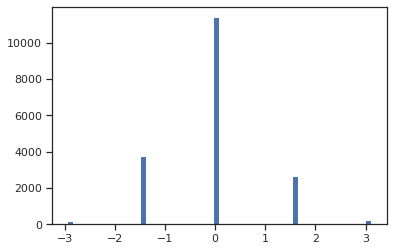

Skill Moves


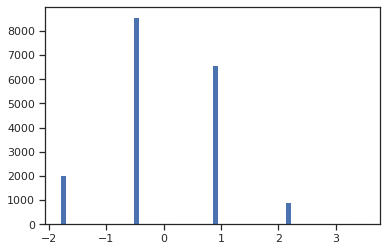

Work Rate


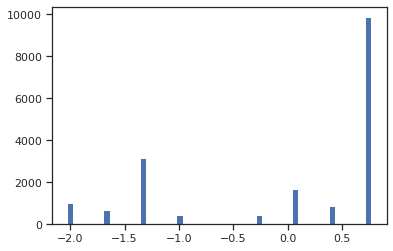

Body Type


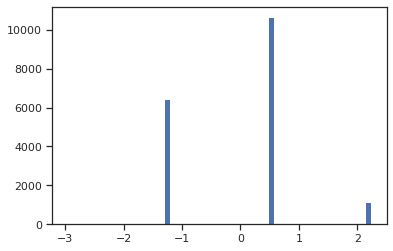

Real Face


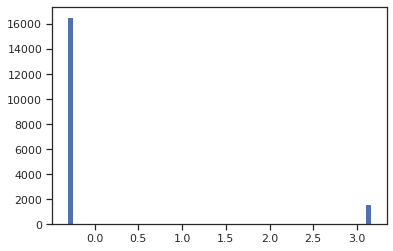

Position


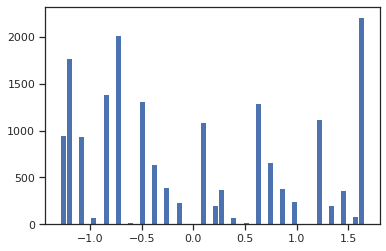

Jersey Number


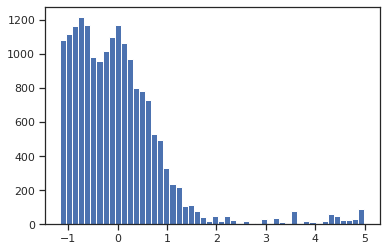

Joined


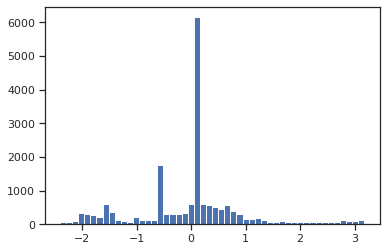

Loaned From


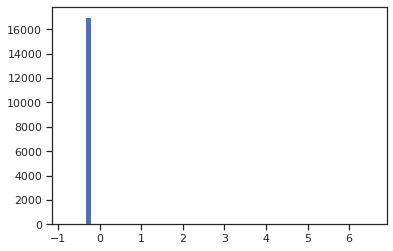

Contract Valid Until


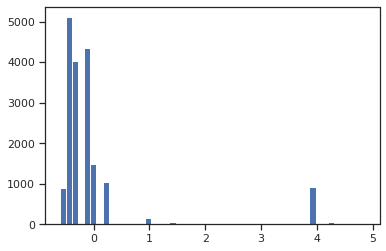

Height


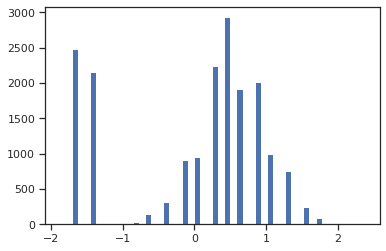

Weight


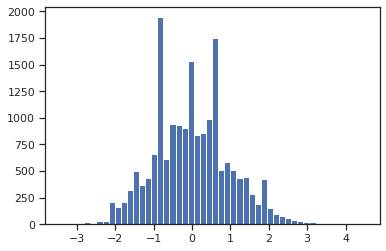

LS


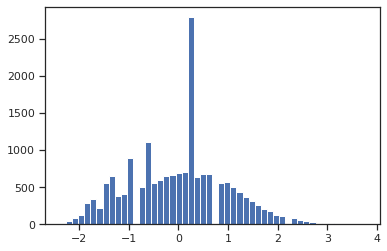

ST


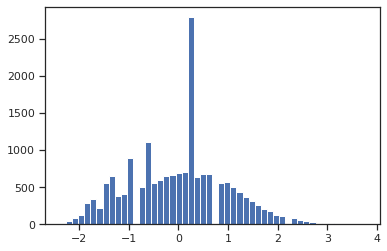

RS


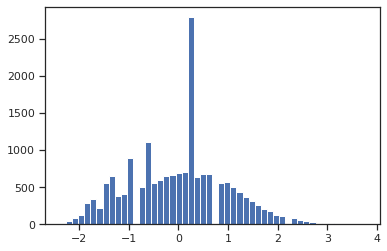

LW


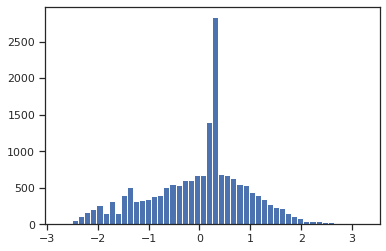

LF


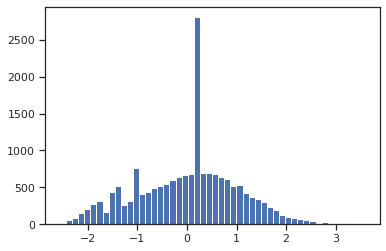

CF


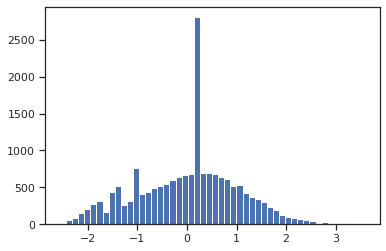

RF


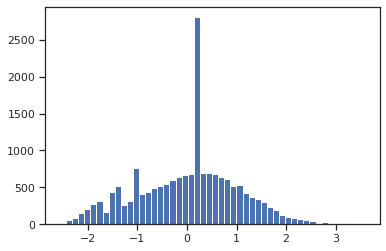

RW


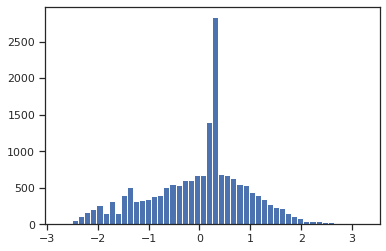

LAM


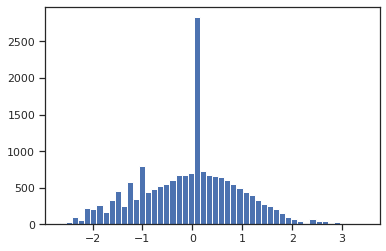

CAM


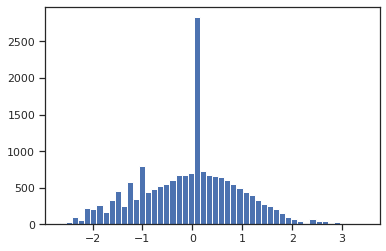

RAM


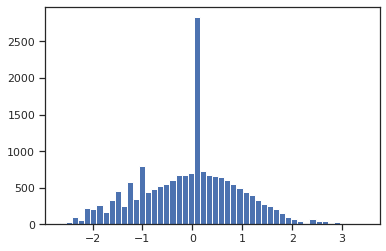

LM


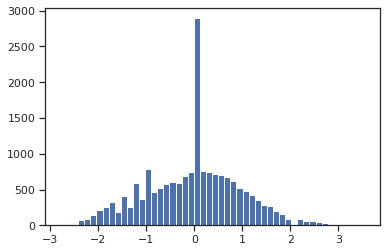

LCM


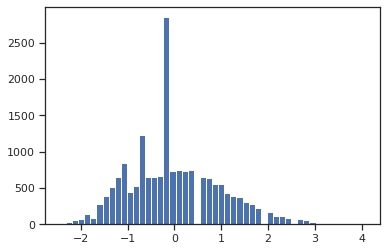

CM


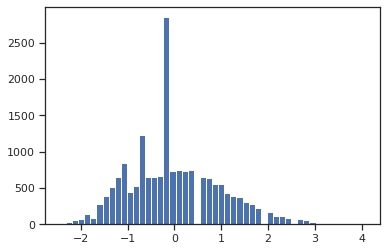

RCM


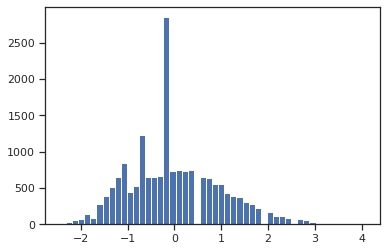

RM


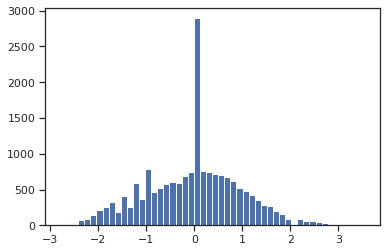

LWB


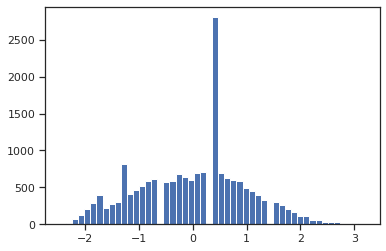

LDM


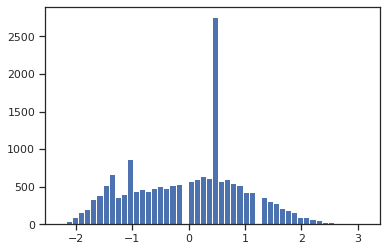

CDM


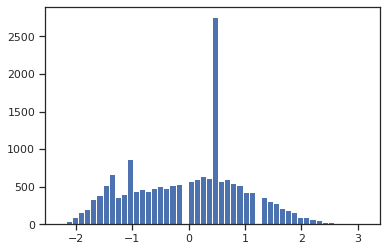

RDM


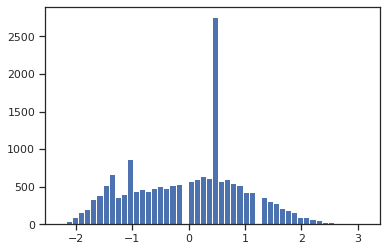

RWB


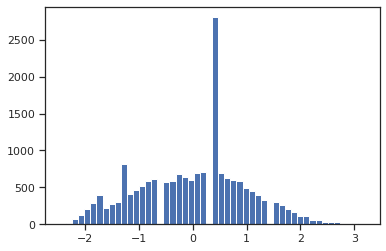

LB


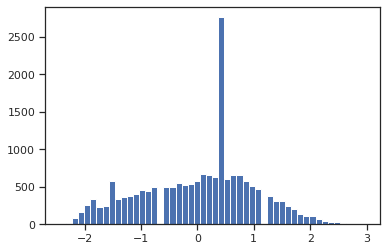

LCB


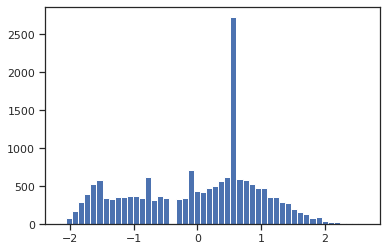

CB


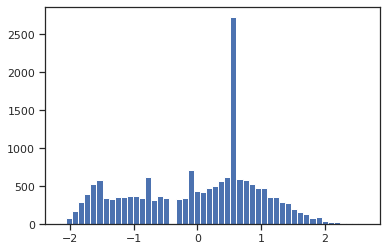

RCB


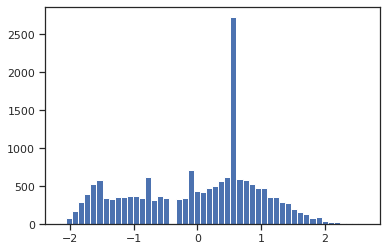

RB


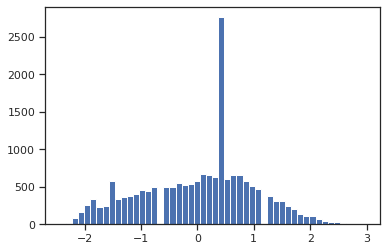

Crossing


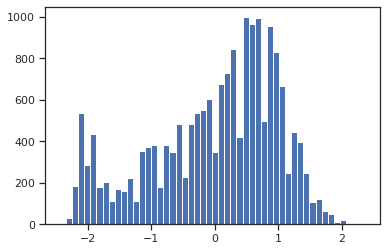

Finishing


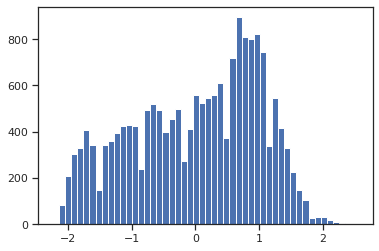

HeadingAccuracy


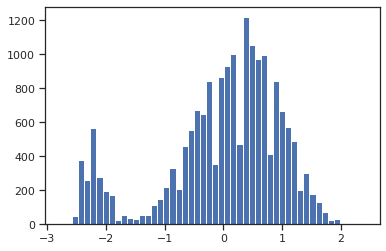

ShortPassing


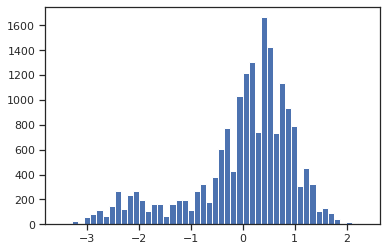

Volleys


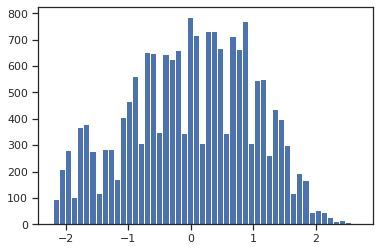

Dribbling


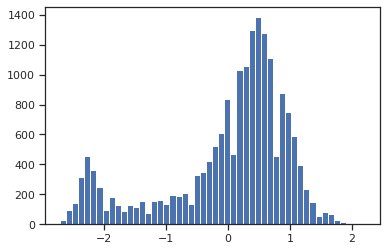

Curve


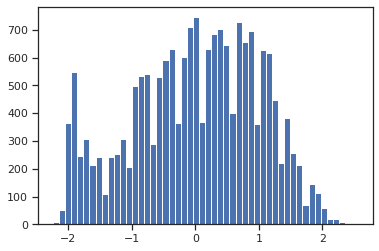

FKAccuracy


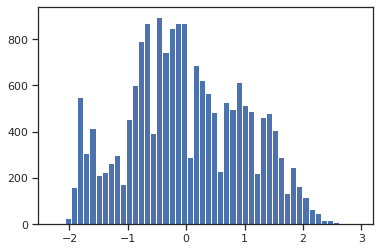

LongPassing


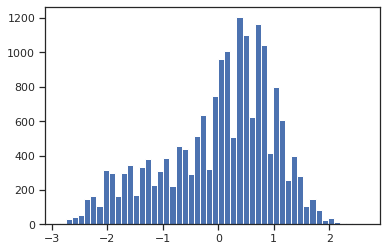

BallControl


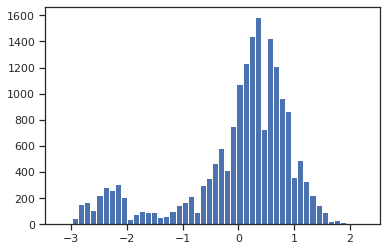

Acceleration


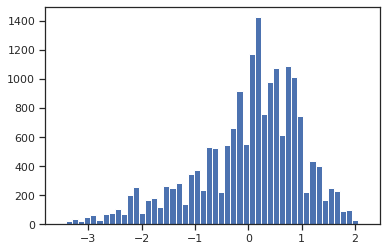

SprintSpeed


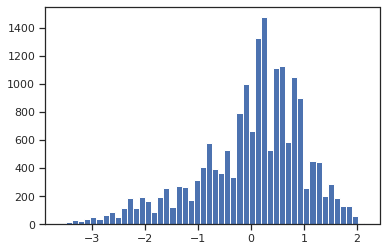

Agility


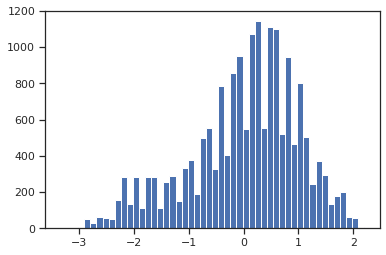

Reactions


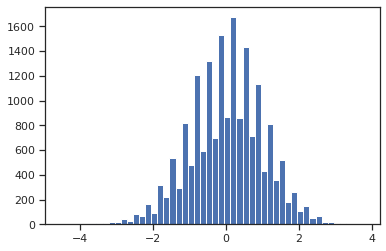

Balance


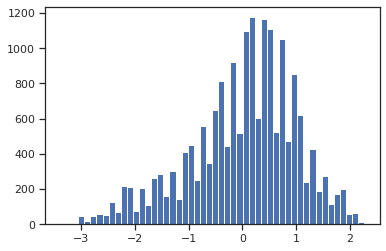

ShotPower


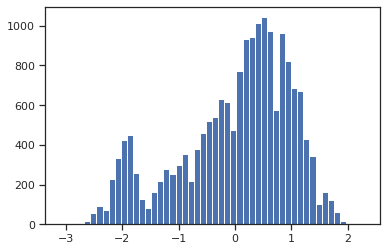

Jumping


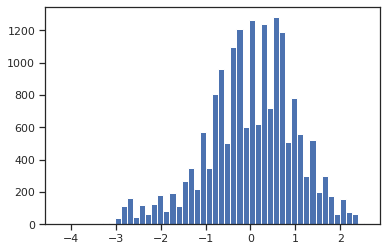

Stamina


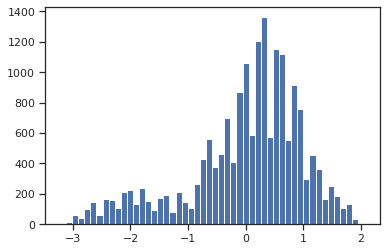

Strength


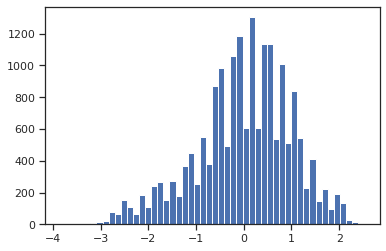

LongShots


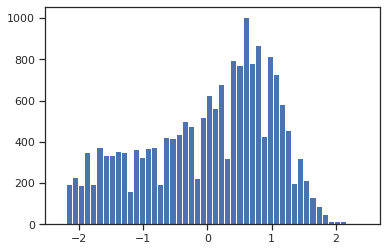

Aggression


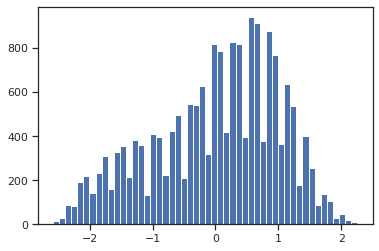

Interceptions


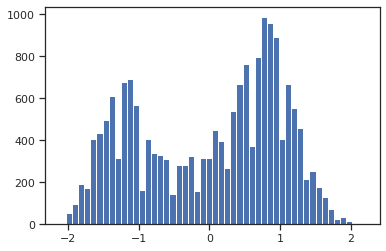

Positioning


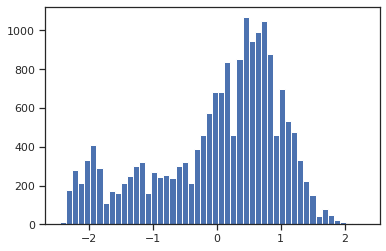

Vision


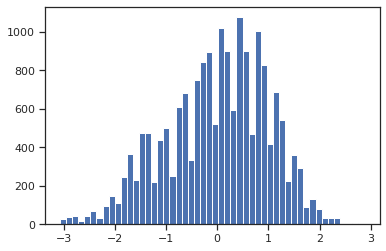

Penalties


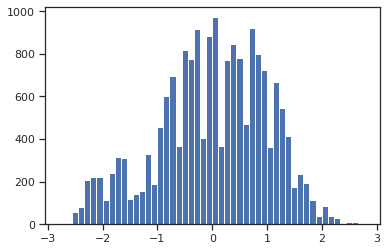

Composure


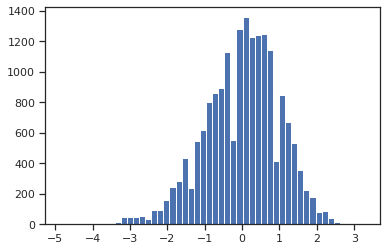

Marking


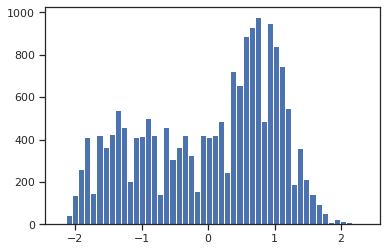

StandingTackle


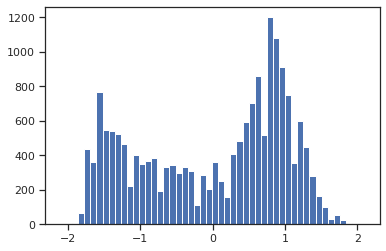

SlidingTackle


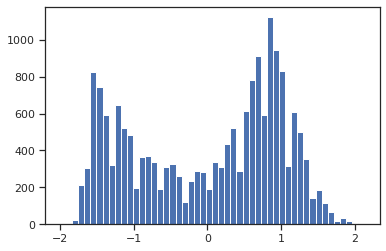

GKDiving


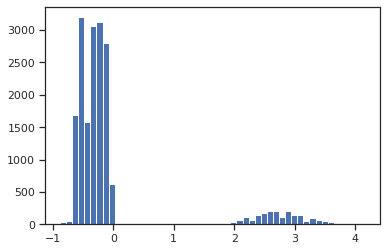

GKHandling


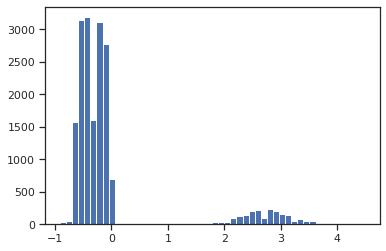

GKKicking


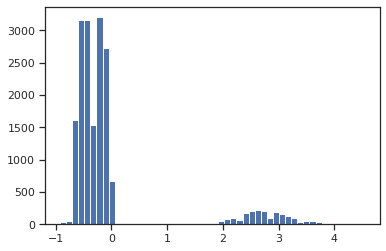

GKPositioning


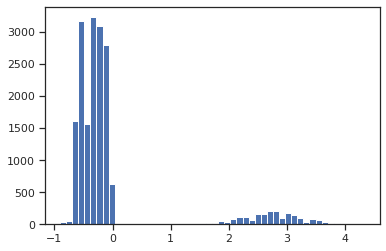

GKReflexes


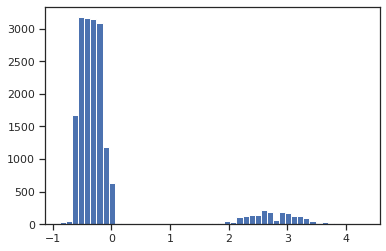

Release Clause


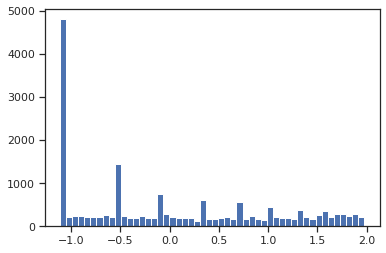

In [218]:
sc1 = StandardScaler()
for col in data.columns:
    sc1_data = sc1.fit_transform(data[[col]])
    print(col)
    plt.hist(sc1_data, 50)
    plt.show()

### Нормализация

Unnamed: 0


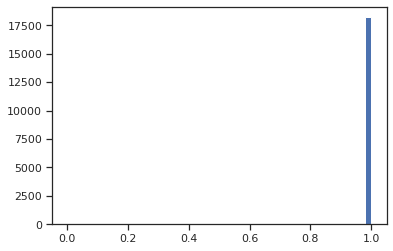

ID


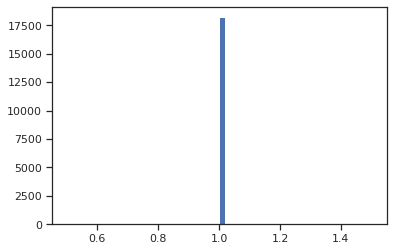

Name


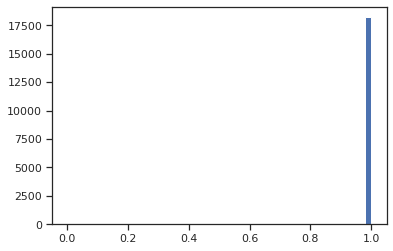

Age


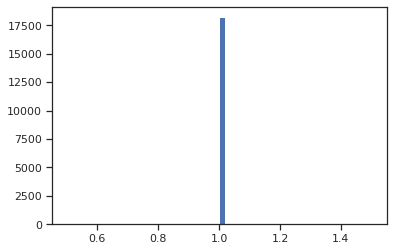

Photo


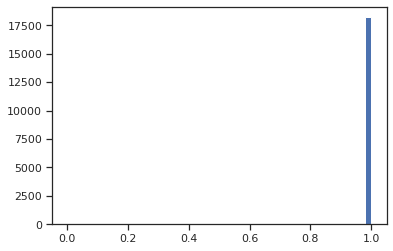

Nationality


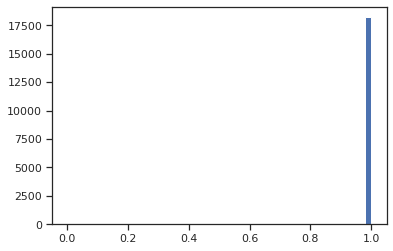

Flag


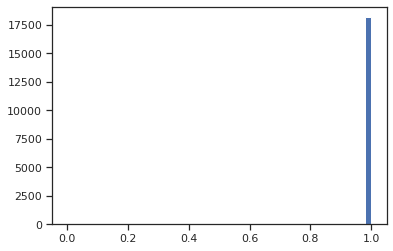

Overall


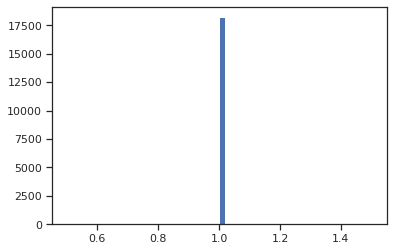

Potential


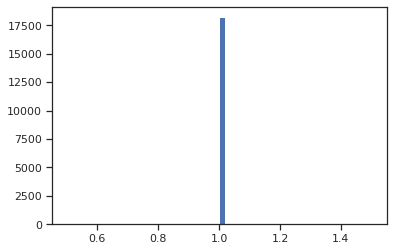

Club


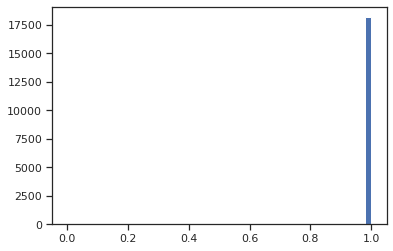

Club Logo


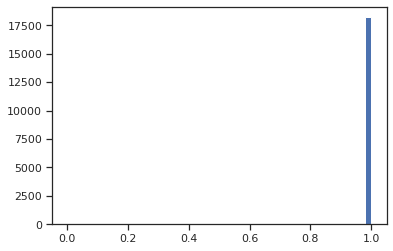

Value


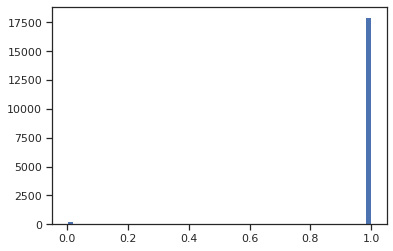

Wage


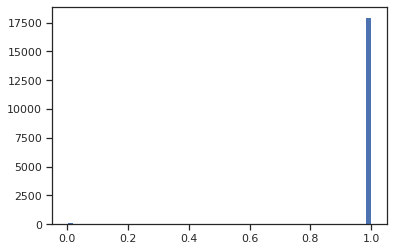

Special


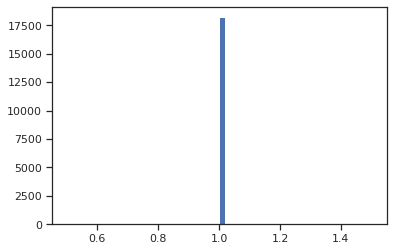

Preferred Foot


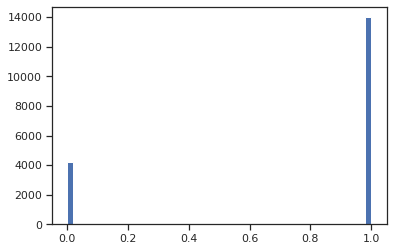

International Reputation


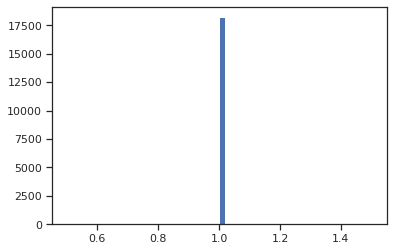

Weak Foot


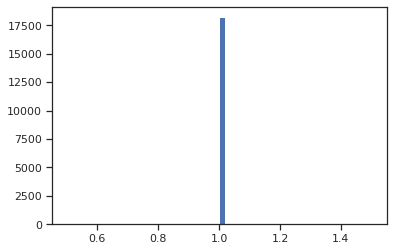

Skill Moves


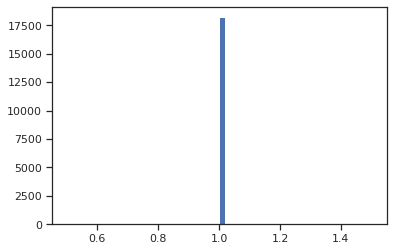

Work Rate


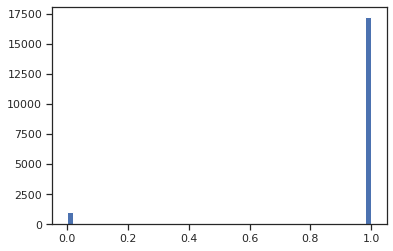

Body Type


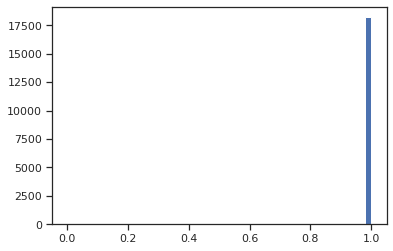

Real Face


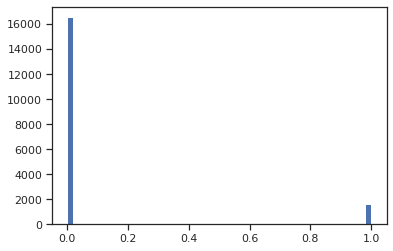

Position


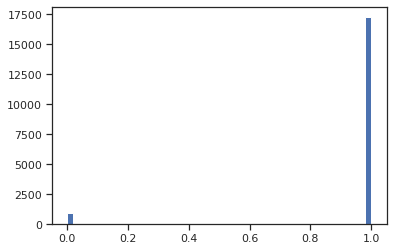

Jersey Number


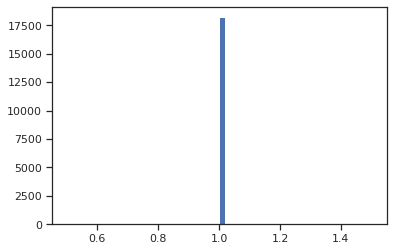

Joined


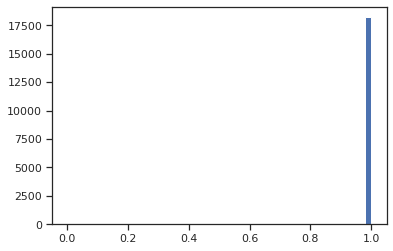

Loaned From


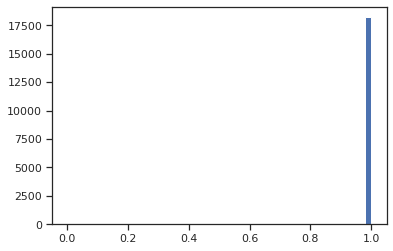

Contract Valid Until


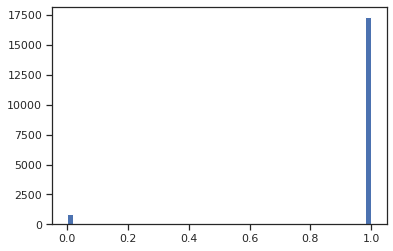

Height


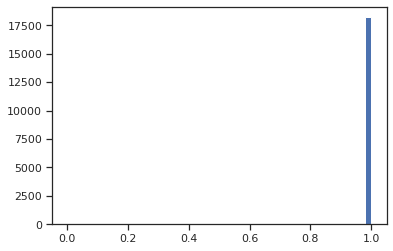

Weight


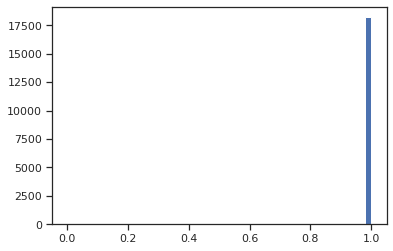

LS


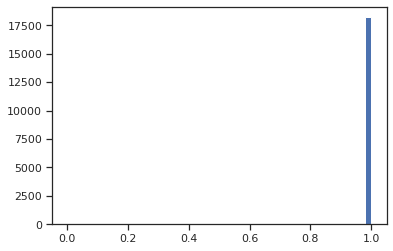

ST


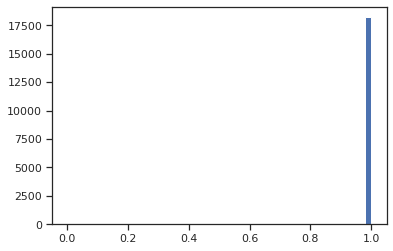

RS


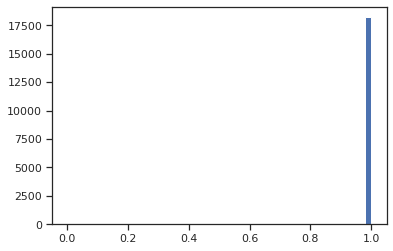

LW


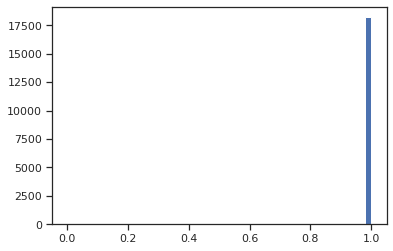

LF


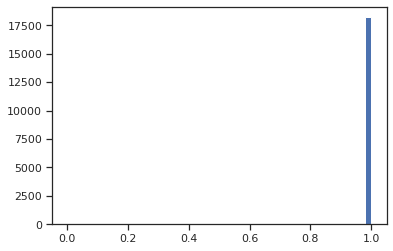

CF


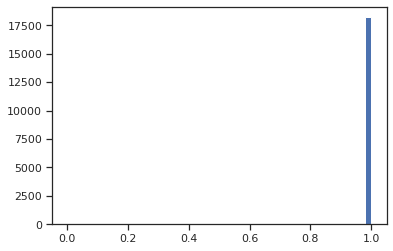

RF


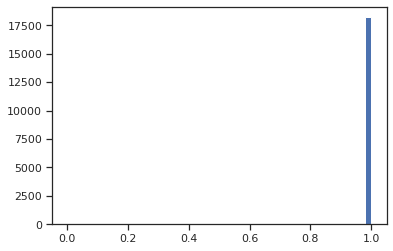

RW


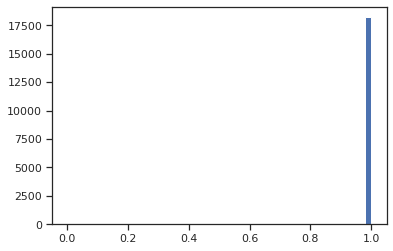

LAM


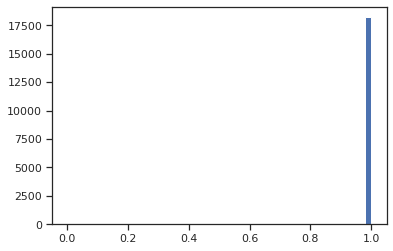

CAM


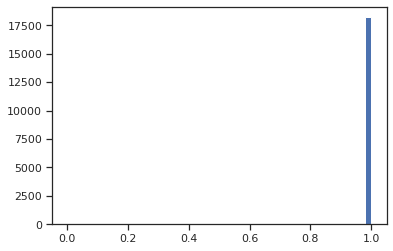

RAM


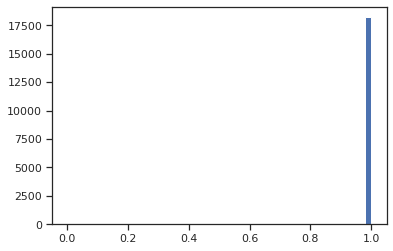

LM


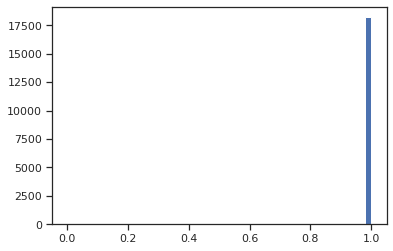

LCM


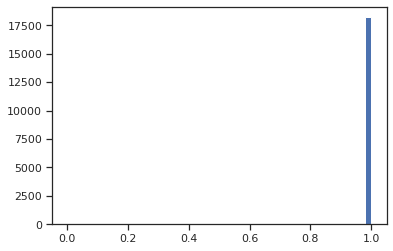

CM


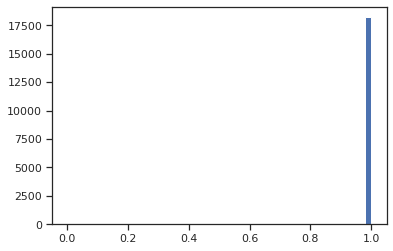

RCM


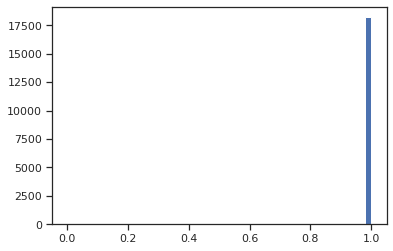

RM


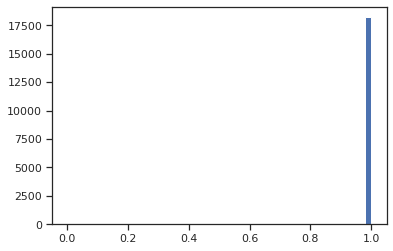

LWB


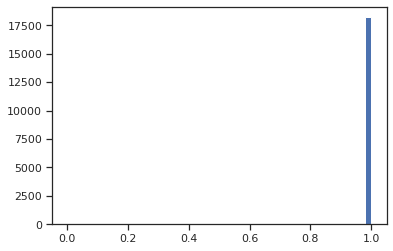

LDM


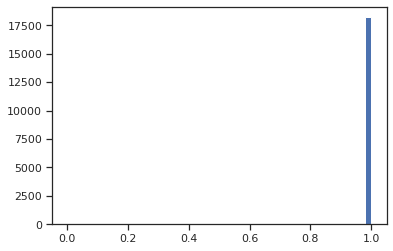

CDM


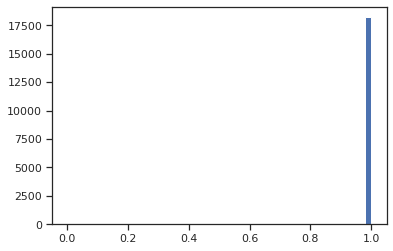

RDM


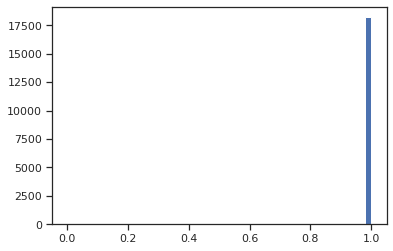

RWB


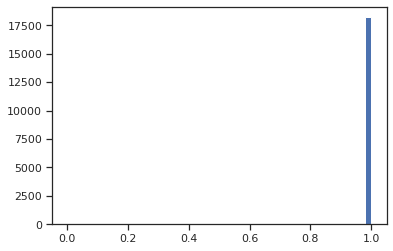

LB


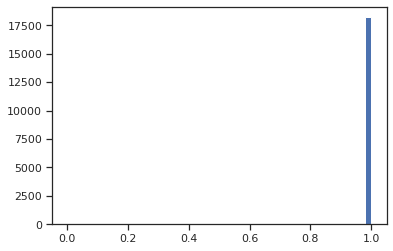

LCB


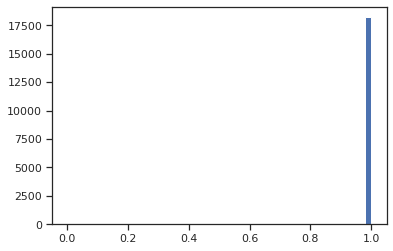

CB


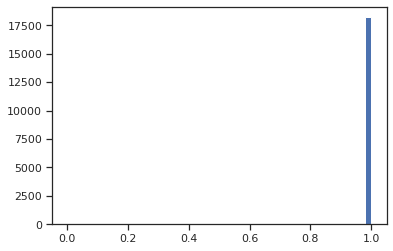

RCB


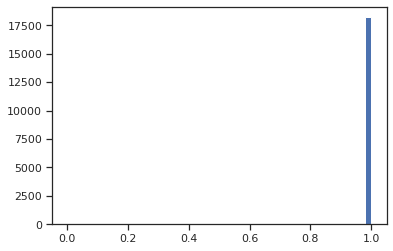

RB


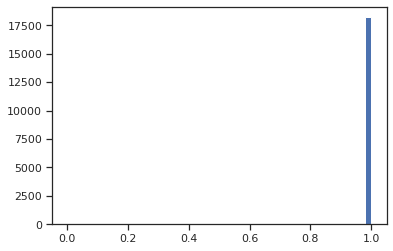

Crossing


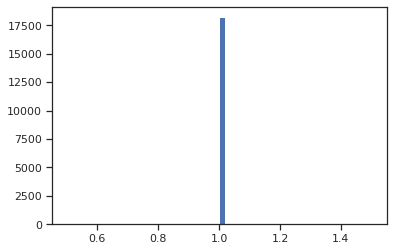

Finishing


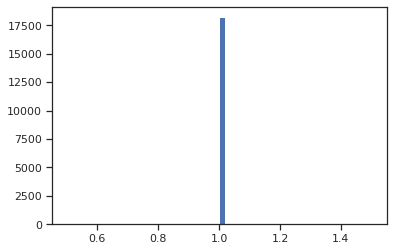

HeadingAccuracy


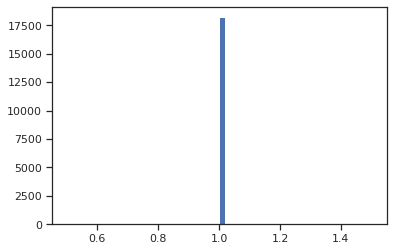

ShortPassing


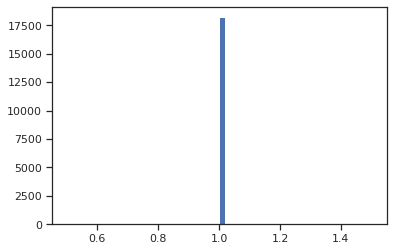

Volleys


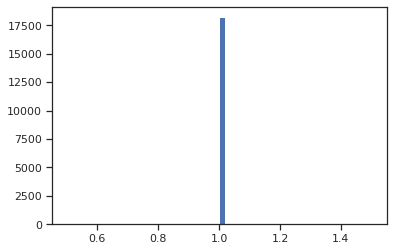

Dribbling


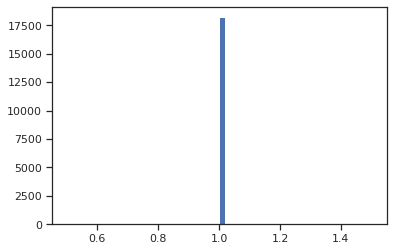

Curve


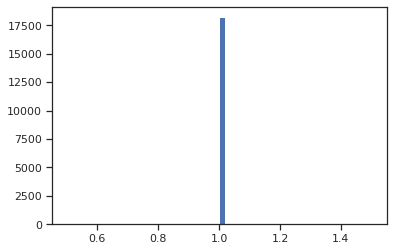

FKAccuracy


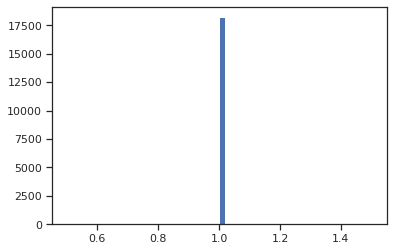

LongPassing


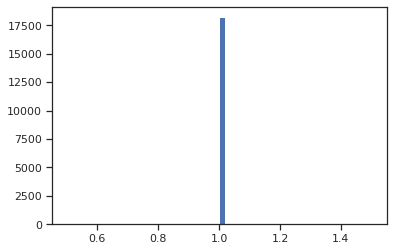

BallControl


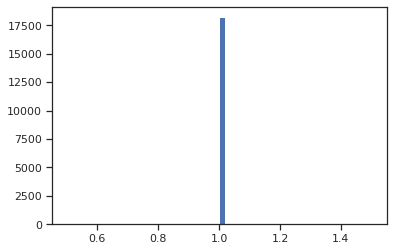

Acceleration


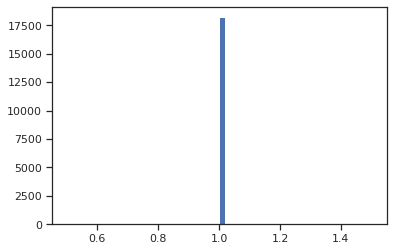

SprintSpeed


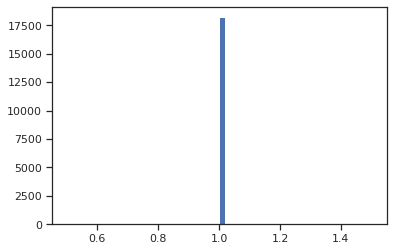

Agility


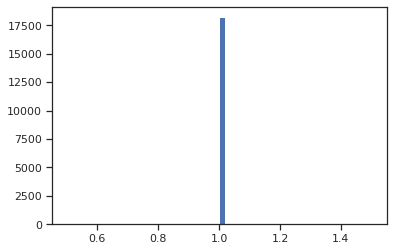

Reactions


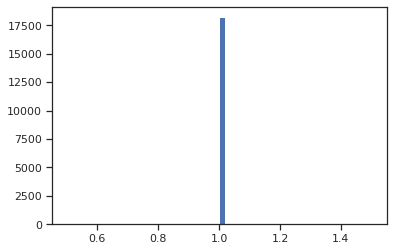

Balance


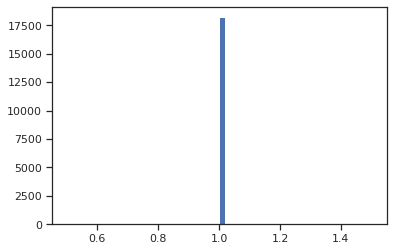

ShotPower


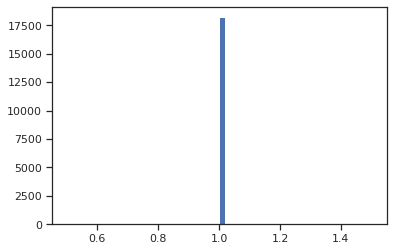

Jumping


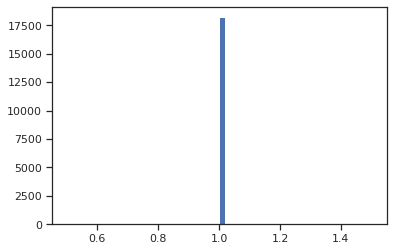

Stamina


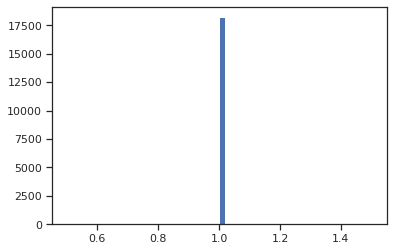

Strength


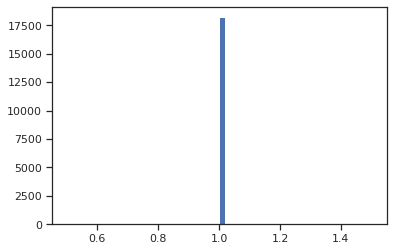

LongShots


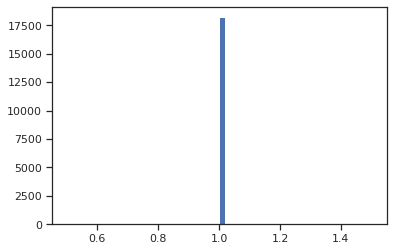

Aggression


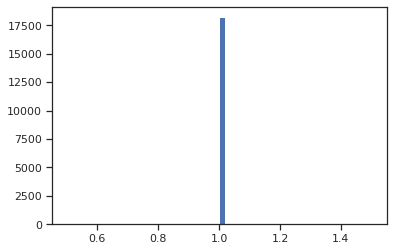

Interceptions


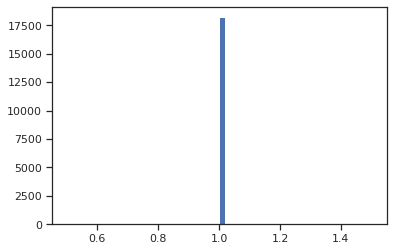

Positioning


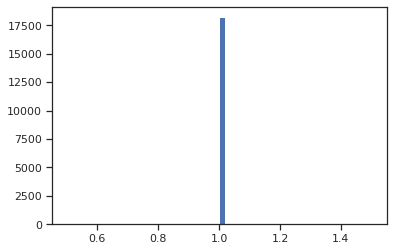

Vision


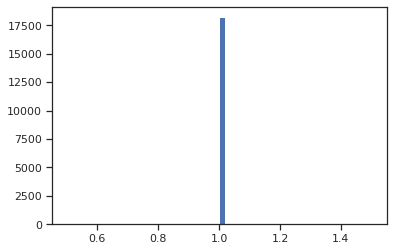

Penalties


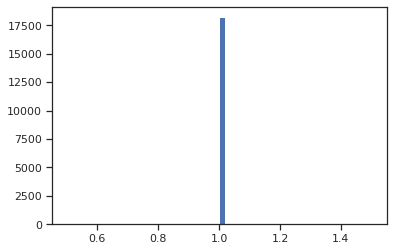

Composure


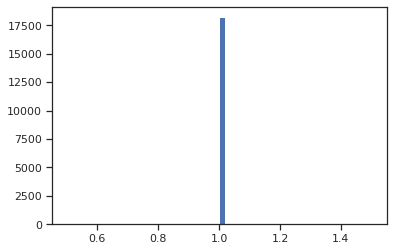

Marking


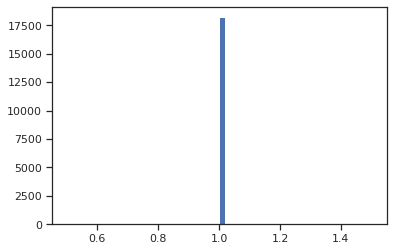

StandingTackle


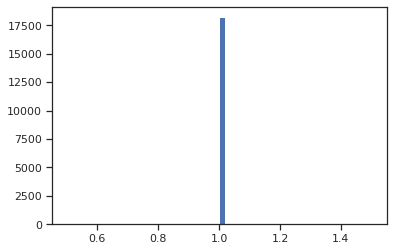

SlidingTackle


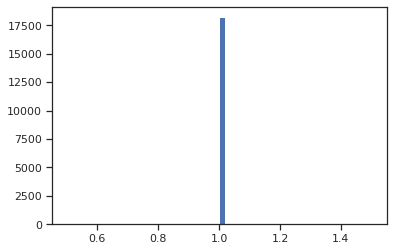

GKDiving


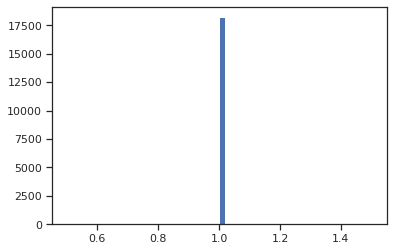

GKHandling


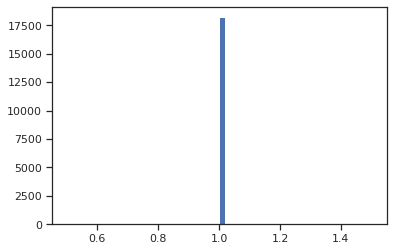

GKKicking


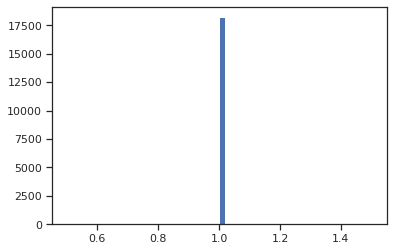

GKPositioning


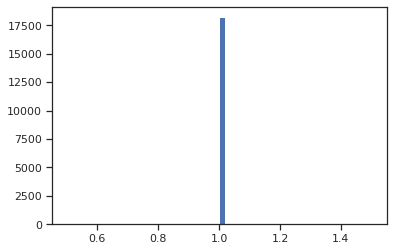

GKReflexes


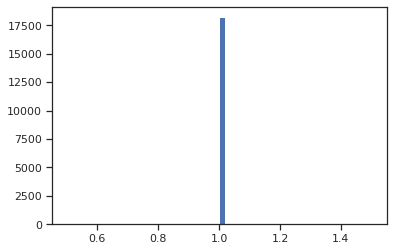

Release Clause


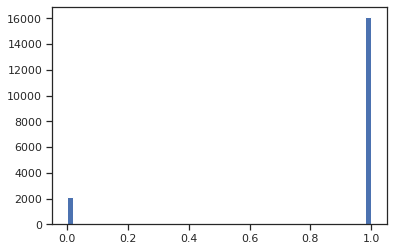

In [219]:
sc2 = Normalizer()
for col in data.columns:
    sc2_data = sc2.fit_transform(data[[col]])
    print(col)
    plt.hist(sc2_data, 50)
    plt.show()

### Диаграмма рассеяния

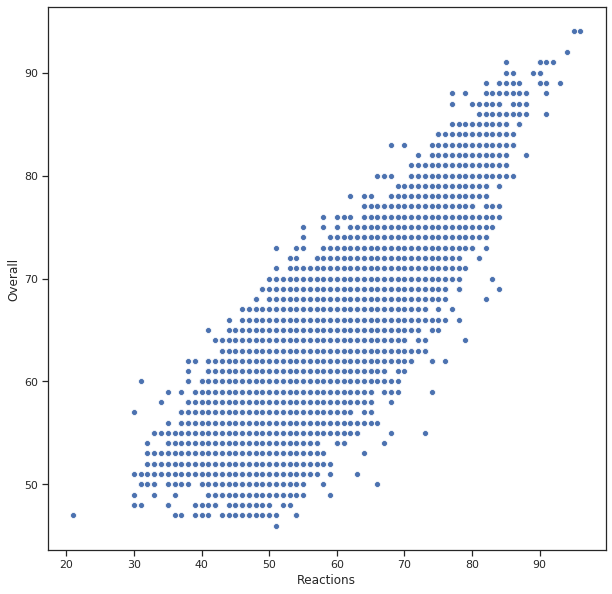

In [227]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Reactions', y='Overall', data=data)

###### По данному графику видим, что от скорости реакции футболиста напрямую зависит его общий рейтинг

## Вывод:
    В процессе выполнения данной работы были изучены методы обработки пропусков в данных, кодирования категориальных признаков и масштабирования данных.